In [10]:
from module_imports import *
from download_data import *
from import_data import *
from larochelle_nn import *

%matplotlib inline

Q_stock_df, Q_prediction_df, Q_pred_tickers = get_quandl_data()
G_stock_df, G_prediction_df, G_pred_tickers = get_goog_data()

GQ_df = pd.merge(Q_stock_df, G_stock_df, how='outer', on=['ticker', 'date']).dropna()
GQ_df = GQ_df[GQ_df['label_x'] == GQ_df['label_y']]

GQ_prediction_df = pd.merge(Q_prediction_df, G_prediction_df, how='outer', on=['ticker', 'date'])

---

---

Testing Loss: 1.76666666667


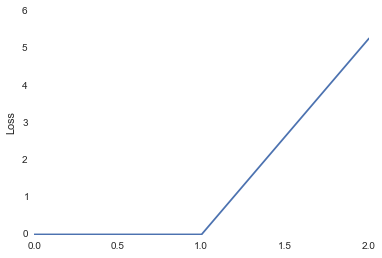

In [12]:
def loss(f_x,y):
    i = np.where(y == 1)[0][0]
    return -np.log(f_x[i]) # negative log-likelihood

def forward_prop(x, W1, b1, W2, b2, W3, b3):
    def sigm(z):
        return 1/(1+np.exp(-z))

    def softmax(z):
        return np.exp(z)/np.sum(np.exp(z))

    z1 = b1 + np.dot(W1,x)
    a1 = sigm(z1)

    z2 = b2 + np.dot(W2,a1)
    a2 = sigm(z2)

    z3 = b3 + np.dot(W3,a2)
    a3 = softmax(z3)

    f_x = a3
    return z1, a1, z2, a2, z3, a3, f_x

testing_losses = []
# testing
for x,y in zip(X_test, y_test):

    x = scaler.transform(x)
    x = x.reshape(x.shape[0],1)
    y = y.reshape(y.shape[0],1)

    z1, a1, z2, a2, z3, a3, f_x = forward_prop(x, W[0], b[0], W[1], b[1], W[2], b[2])

    testing_loss = np.round(loss(f_x,y),2)
    testing_losses.append(testing_loss)
    
print "Mean Testing Loss:", np.mean(testing_losses)
      
plt.plot(testing_losses)
plt.ylabel('Loss')
plt.show()

 0 ACOR [ 0.99488497] [ 0.00511503]
 1 AERI [ 0.99488497] [ 0.00511503]
 2 AFFX [ 0.99488497] [ 0.00511503]
 3 AGEN [ 0.99488497] [ 0.00511503]
 4 ARIA [ 0.99488497] [ 0.00511503]
 5 ARNA [ 0.99488497] [ 0.00511503]
 6 ARWR [ 0.99488497] [ 0.00511503]
 7 AXDX [ 0.99488497] [ 0.00511503]
 8 BABY [ 0.99488497] [ 0.00511503]
 9 BCRX [ 0.99488497] [ 0.00511503]
10 BIIB [ 0.99488497] [ 0.00511503]
11 BLUE [ 0.99488497] [ 0.00511503]
12 BRKR [ 0.99488497] [ 0.00511503]
13 CBPO [ 0.99488497] [ 0.00511503]
14 CLDN [ 0.99488497] [ 0.00511503]
15 CLDX [ 0.99488497] [ 0.00511503]
16 CNMD [ 0.99488497] [ 0.00511503]
17 CPHD [ 0.99488497] [ 0.00511503]
18 CPRX [ 0.99488497] [ 0.00511503]
19 CRIS [ 0.99488497] [ 0.00511503]
20 CYBX [ 0.99488497] [ 0.00511503]
21 CYNO [ 0.99488497] [ 0.00511503]
22 CYTR [ 0.99488497] [ 0.00511503]
23 DSCO [ 0.99488497] [ 0.00511503]
24 DYAX [ 0.99488497] [ 0.00511503]
25 ECYT [ 0.99488497] [ 0.00511503]
26 ENZN [ 0.99488497] [ 0.00511503]
27 EXAS [ 0.99488497] [ 0.00